## Домашнее задание 2 (10 баллов)

## Часть 1

В первой части домашнего задания вы попрактикуетесь в работе с библиотекой numpy, которая позволяет сравнительно легко и удобно выполнять разнообразные вычисления, избегая самостоятельной реализации поэлементной обработки.

Во всех задачах необходимо написать код решения внутри функции и убедиться, что она работает, с помощью [assert](https://python-reference.readthedocs.io/en/latest/docs/statements/assert.html) на выражение с использованием этой функции для данных из условия.

При решении задач запрещается использовать циклы (`for`, `while`) и оператор `if`.

Везде, где встречаются массивы или матрицы, подразумевается, что это `numpy.array`.

**numpy reference:** https://numpy.org/doc/stable/reference/index.html

In [1524]:
import numpy as np

### Задание 1

Напишите функцию, возвращающую округленную взвешенную сумму оценок по данным оценкам и весам. Можете посчитать свою оценку за курс :) В нашем случае вес экзамена равен 0.3, вес домашек - 0.4, вес контрольной - 0.2, вес самостоятельных - 0.1. Например, если за экзамен у вас 7, за домашки 10, за контрольную 8, а за самостоятельные 6, то вы получите отличную оценку 8!

In [1525]:
def result_mark(weights: np.array, marks: np.array) -> int:
    return np.round(np.dot(weights,marks),0)
#     return np.round(weights@marks,0)

In [1526]:
weights = np.array([0.3, 0.4, 0.2, 0.1])
marks = np.array([7, 10, 8, 6])

assert result_mark(weights, marks) == 8

In [1527]:
weights = np.array([0.3, 0.4, 0.2, 0.1])
marks = np.array([7, 0, 8, 6])

assert result_mark(weights, marks) == 4

### Задание 2

Напишите функцию, меняющую каждое третье (начиная с 0) значение массива целых чисел на заданное число. Например, если на вход поступает массив `array([3, 5, 1, 0, -3, 22, 213436])` и число `-111`, то на выходе должен получиться массив `array([-111, 5, 1, -111, -3, 22, -111])`.

In [1528]:
def change_array(array: np.array, number: int) -> np.array:
    array[0::3] = number
    return array

In [1529]:
array = np.array([3, 5, 1, 0, -3, 22, 213436])
number = -111

assert np.allclose(change_array(array, number), np.array([-111, 5, 1, -111, -3, 22, -111]))

In [1530]:
array = np.array([3, 14, 15, 92, 6])
number = 8

assert np.allclose(change_array(array, number), np.array([8, 14, 15, 8, 6]))

### Задание 3

Напишите функцию, выдающую индексы «близких» элементов заданных массивов, а именно тех пар элементов, чей модуль разницы не превосходит заданного значения. Например, если на вход поступают массив `array([1.5, 0.5, 2, -4.1, -3, 6, -1])`, массив `array([1.2, 0.5, 1, -4, 3, 0, -1.2])` и число `0.5`, то на выходе должен получиться массив `array([0, 1, 3, 6])` (**важно: не `tuple`, а одномерный массив типа `numpy.ndarray` (то есть `.ndim` от него равно 1)!**).

In [1531]:
def find_close(array1: np.array, array2: np.array,
               precision: float) -> np.array:
    return np.array(np.where(abs(array1 - array2)<precision))[0]
    

In [1532]:
array1 = np.array([1.5, 0.5, 2, -4.1, -3, 6, -1])
array2 = np.array([1.2, 0.5, 1, -4.0,  3, 0, -1.2])
precision = 0.5
res = find_close(array1, array2, precision)

assert res.ndim == 1
assert np.allclose(res, np.array([0, 1, 3, 6]))

In [1533]:
array1 = np.array([3.1415, 2.7182, 1.6180, 6.6261])
array2 = np.array([6.6730, 1.3807, -1,     6.0222])
precision = 1.7
res = find_close(array1, array2, precision)

assert res.ndim == 1
assert np.allclose(res, np.array([1, 3]))

### Задание 4

Напишите функцию, которая составляет блочную матрицу из четырех блоков, где каждый блок - это заданная матрица. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
\end{pmatrix},
$$
то ответом будет матрица
$$
\begin{pmatrix}
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
\end{pmatrix}
$$

In [1534]:
def block_matrix(block: np.array) -> np.array:
    return np.tile(block, [2,2])

In [1535]:
block = np.array([[1, 3, 3], [7, 0, 0]])

assert np.allclose(
    block_matrix(block),
    np.array([[1, 3, 3, 1, 3, 3],
              [7, 0, 0, 7, 0, 0],
              [1, 3, 3, 1, 3, 3],
              [7, 0, 0, 7, 0, 0]])
)

### Задание 5

Напишите функцию, вычисляющую произведение всех ненулевых диагональных элементов на диагонали данной квадратной матрицы. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
6 & 7 & 8\\
\end{pmatrix},
$$
то ответом будет 32.

Элементы матрицы считать целочисленными.

In [1536]:
def diag_prod(matrix: np.array) -> int:
    diag_vec = np.diag(matrix)
    return np.prod(diag_vec[(diag_vec>0)]) 


In [1537]:
matrix = np.array([[0, 1, 2, 3],
                   [4, 5, 6, 7],
                   [8, 9, 10, 11],
                   [12, 13, 14, 15]])

assert diag_prod(matrix) == 750

### Задание 6

Для улучшения качества работы некоторых алгоритмов машинного обучения может быть полезно использовать [нормализацию данных](https://vk.cc/8xmfQk), чтобы привести признаки в выборке к одному масштабу — а именно, из каждого столбца вычесть среднее его значений и поделить на их стандартное отклонение. Напишите функцию, нормализующую входящую матрицу (по столбцам). Например, если на вход подается матрица 
$$
\begin{pmatrix}
1 & 4 & 4200\\
0 & 10 & 5000\\
1 & 2 & 1000\\
\end{pmatrix},
$$
то результатом с точностью до сотых будет матрица
$$
\begin{pmatrix}
0.71 & -0.39 & 0.46\\
-1.41 & 1.37 & 0.93\\
0.71 & -0.98 & -1.39\\
\end{pmatrix}
$$

Учтите, что в вашем матрице не должно получаться никаких nan. Подумайте, в каком случае они могут возникнуть и как обойти эту проблему.

_Подсказка. Казалось бы, при чем тут деление на ноль._

In [1538]:
def normalize(matrix: np.array) -> np.array:
    matrix_residuals = matrix - matrix.mean(axis = 0)
    matrix_norm = np.divide(matrix_residuals, matrix.std(axis = 0), where= matrix.std(axis = 0)!=0)
    return matrix_norm

In [1539]:
matrix = np.array([[1, 4, 4200], [0, 10, 5000], [1, 2, 1000]])

assert np.allclose(
    normalize(matrix),
    np.array([[ 0.7071, -0.39223,  0.46291],
              [-1.4142,  1.37281,  0.92582],
              [ 0.7071, -0.98058, -1.38873]])
)

In [1540]:
matrix = np.array([[-7, 2, 42], [2, 10, 50], [5, 4, 10]])

assert np.allclose(
    normalize(matrix),
    np.array([[-1.37281, -0.98058,  0.46291],
              [ 0.39223,  1.37281,  0.92582],
              [ 0.98058, -0.39223, -1.38873]])
)

### Задание 7

Напишите функцию, вычисляющую какую-нибудь первообразную данного полинома (в качестве константы возьмите $0$). Например, если на вход поступает массив коэффициентов `array([4, 6, 0, 1])`, что соответствует полиному $4x^3 + 6x^2 + 1$, на выходе получается массив коэффициентов `array([1, 2, 0, 1, -2])`, соответствующий полиному $x^4 + 2x^3 + x - 2$.

In [1541]:
def antiderivative(coefs: np.array) -> np.array:
    antder_denom = np.arange(coefs.shape[0],0,-1)
    coefs_div = np.divide(coefs, antder_denom)
    coefs_res = np.append(coefs_div, 0)
    return np.append(coefs_div, 0)

In [1542]:
coefs = np.array([4, 6, 0, 1])

assert np.allclose(
    antiderivative(coefs),
    np.array([1., 2., 0., 1., 0.])
)

In [1543]:
coefs = np.array([1, 7, -12, 21, -6])

assert np.allclose(
    antiderivative(coefs),
    np.array([ 0.2, 1.75, -4., 10.5, -6., 0.])
)

### Задание 8

Напишите функцию, делающую данную [треугольную матрицу](https://ru.wikipedia.org/wiki/%D0%A2%D1%80%D0%B5%D1%83%D0%B3%D0%BE%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%86%D0%B0) симметричной. Например, если на вход поступает матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
0 & 5 & 6 & 7\\
0 & 0 & 8 & 9\\
0 & 0 & 0 & 10\\
\end{pmatrix},
$$
то на выходе должна быть матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
2 & 5 & 6 & 7\\
3 & 6 & 8 & 9\\
4 & 7 & 9 & 10\\
\end{pmatrix}.
$$

In [1544]:
def make_symmetric(matrix: np.array) -> np.array:
    matrix_sum = matrix + matrix.transpose()
    np.fill_diagonal(matrix_sum, np.diag(matrix))
    return matrix_sum

In [1545]:
matrix = np.array([[1, 2, 3, 4], [0, 5, 6, 7], [0, 0, 8, 9], [0, 0, 0, 10]])

assert np.allclose(
    make_symmetric(matrix),
    np.array([[ 1,  2,  3,  4],
              [ 2,  5,  6,  7],
              [ 3,  6,  8,  9],
              [ 4,  7,  9, 10]])
)

In [1546]:
matrix = np.array([[10, 21, 32, 49], [0, 53, 62, 78], [0, 0, 82, 92], [0, 0, 0, 10]])

assert np.allclose(
    make_symmetric(matrix),
    np.array([[10, 21, 32, 49],
              [21, 53, 62, 78],
              [32, 62, 82, 92],
              [49, 78, 92, 10]])
)

### Задание 9

Напишите функцию, создающую прямоугольную матрицу из m одинаковых строк, заполненных последовательными натуральными числами от a до b включительно в возрастающем порядке. Например, если m = 5, a = 3, b = 10, то на выходе будет матрица
$$
\begin{pmatrix}
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
\end{pmatrix}
$$

In [1547]:
def construct_matrix(m: int, a: int, b: int) -> np.array:
    x = np.zeros((m, b-a+1))
    y = np.arange(a,b+1)
    z = x + y
    return z

In [1548]:
m = 5
a = 3
b = 10

assert np.allclose(
    construct_matrix(m, a, b),
    np.array([[ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10]])
)

In [1549]:
m = 3
a = 2
b = 6

assert np.allclose(
    construct_matrix(m, a, b),
    np.array([[2, 3, 4, 5, 6],
              [2, 3, 4, 5, 6],
              [2, 3, 4, 5, 6]])
)

### Задание 10

Напишите функцию, вычисляющую [косинусную близость](https://en.wikipedia.org/wiki/Cosine_similarity) двух векторов. Например, если на вход поступают вектора `array([-2, 1, 0, -5, 4, 3, -3])` и `array([0, 2, -2, 10, 6, 0, 0])`, ответом будет -0.25.

In [1550]:
def cosine_similarity(vec1: np.array, vec2: np.array) -> float:
    dot_scal = np.dot(vec1, vec2)
    magnit = (np.dot(vec1, vec1)**0.5) * (np.dot(vec2, vec2)**0.5)
    cos_sim = dot_scal / magnit
    return cos_sim

In [1551]:
vec1 = np.array([-2, 1,  0, -5, 4, 3, -3])
vec2 = np.array([ 0, 2, -2, 10, 6, 0,  0])

assert np.allclose(cosine_similarity(vec1, vec2), -0.25)

In [1552]:
vec1 = np.array([-4, 2,  9, -8, 9, 0, -2])
vec2 = np.array([ 3, 2, -4, -1, 3, 2,  2])

assert np.allclose(cosine_similarity(vec1, vec2), -0.119929)

## Часть 2

Поработайте с датасетом affairs. Предскажите значение в колонке affairs по остальным факторам.

* Сначала проведите разведочный анализ, а именно, исследуйте зависимость таргета от каждого фактора (или пары факторов).

* Обучите линейную регрессию, посмотрите на качество на кросс-валидации, затем разбейте данные на train и test, обучите алгоритм на train и сделайте предсказания на train и test, выведите ошибки.

* Посмотрите на матрицу корреляций факторов и целевой переменной. Если есть пары сильно коррелирующих между собой факторов, удалите один из пары.

* Если есть факторы, слабо коррелирующие с таргетом, удалите их.

* Попытайтесь сконструировать новые признаки.

* Заново обучите алгоритм на обновленных данных. Как изменилось его качество?

**Ваша цель**: добиться наилучшего качества по метрике $r^2$ на кросс-валидации.

In [1571]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("affairs.csv")

##### 1.Разведочный анализ (тип данных и n/a),  зависимость таргета от факторов

In [1572]:
from matplotlib import pylab as plt
%pylab inline

print (df.dtypes)
print (pd.isna(df).sum())

for col in df.columns:
    print ('тип', df[col].dtypes,
           '\nуникальные значения\n', df[col].value_counts(), 
           '\n количество уникальных значений', len(df[col].unique()), '\n')

Populating the interactive namespace from numpy and matplotlib
rate_marriage      float64
age                float64
yrs_married        float64
children           float64
religious          float64
educ               float64
occupation         float64
occupation_husb    float64
affairs            float64
dtype: object
rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
dtype: int64
тип float64 
уникальные значения
 5.0    2684
4.0    2242
3.0     993
2.0     348
1.0      99
Name: rate_marriage, dtype: int64 
 количество уникальных значений 5 

тип float64 
уникальные значения
 27.0    1931
22.0    1800
32.0    1069
42.0     793
37.0     634
17.5     139
Name: age, dtype: int64 
 количество уникальных значений 6 

тип float64 
уникальные значения
 2.5     2034
6.0     1141
16.5     818
23.0     811
9.0      602
13.0     590
0.5      370
Name: yrs_marri

D:\Anaconda\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


<Figure size 320x240 with 0 Axes>

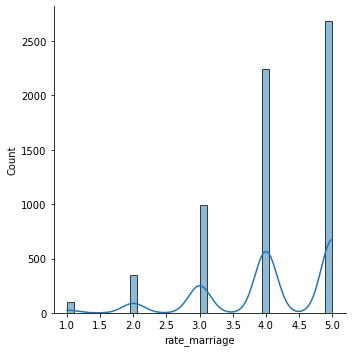

<Figure size 320x240 with 0 Axes>

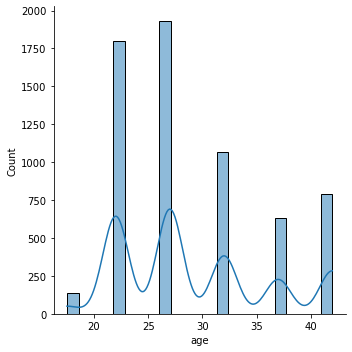

<Figure size 320x240 with 0 Axes>

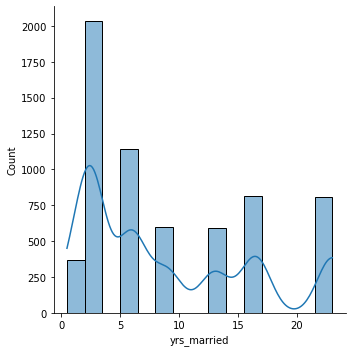

<Figure size 320x240 with 0 Axes>

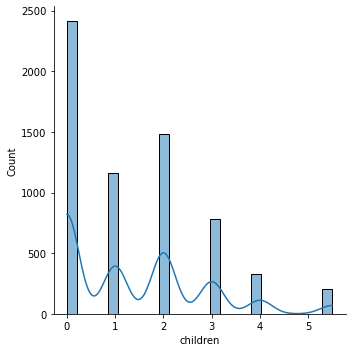

<Figure size 320x240 with 0 Axes>

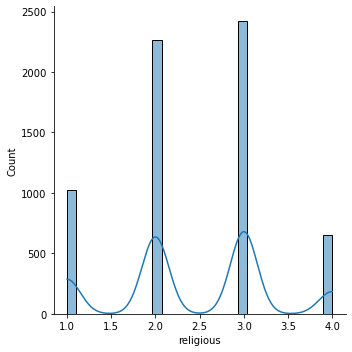

<Figure size 320x240 with 0 Axes>

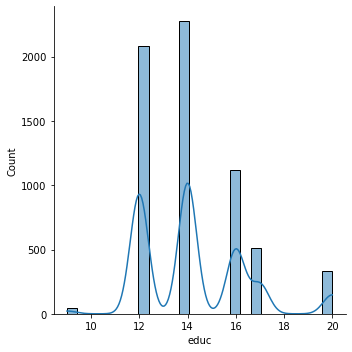

<Figure size 320x240 with 0 Axes>

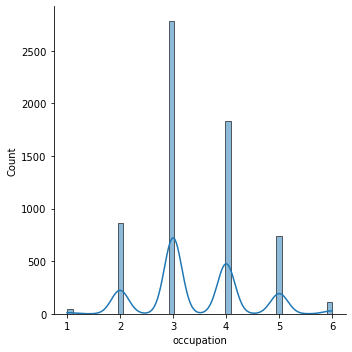

<Figure size 320x240 with 0 Axes>

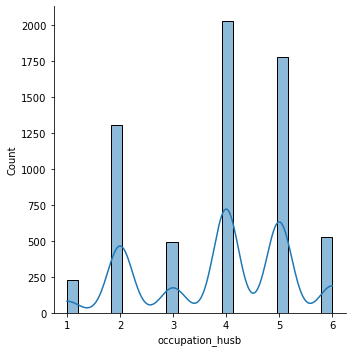

<Figure size 320x240 with 0 Axes>

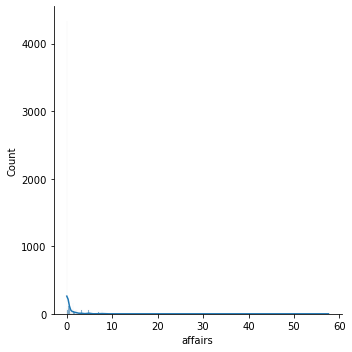

In [1573]:
#смотрим на распределения переменных
for col in df.columns:
    plt.figure(figsize=(4,3), dpi= 80)
    sns.displot(df[col], kde = True)

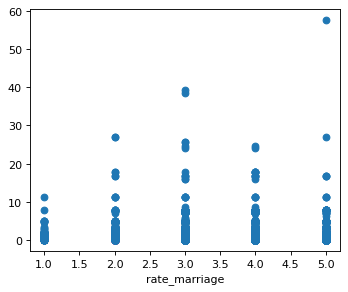

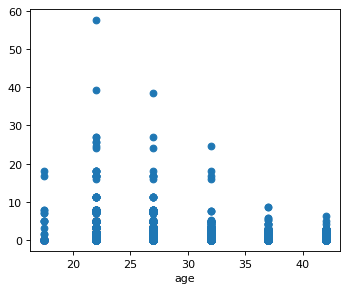

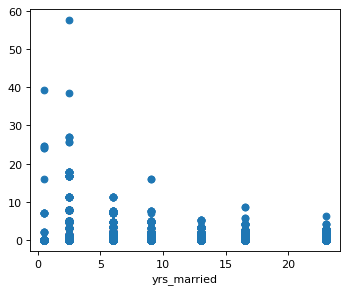

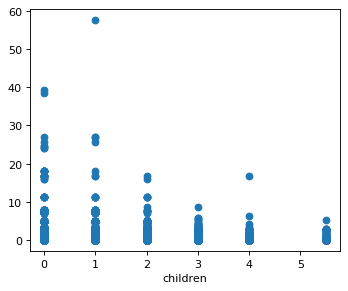

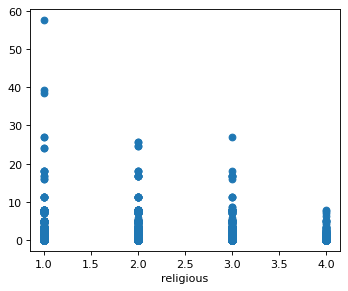

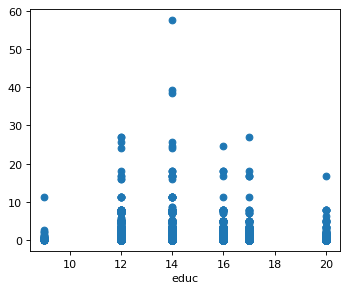

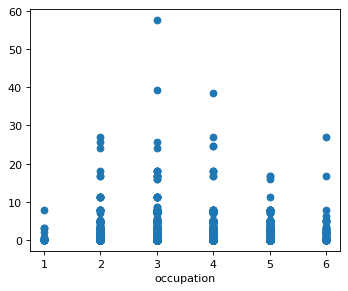

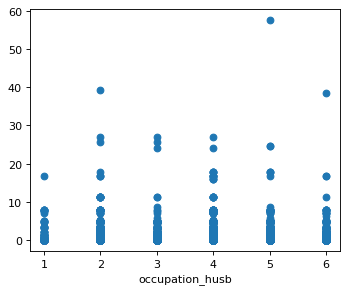

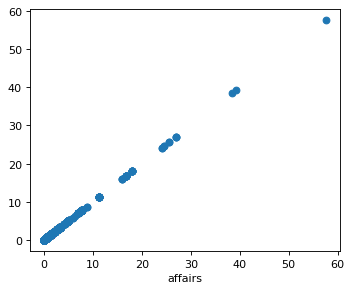

In [1574]:
#смотрим на характер зависимости с таргетом
for col in df.columns:
    plt.figure(figsize=(5,4), dpi= 80)
    plt.xlabel(col)
    scatter (df[col], df['affairs'])

##### 2.1. Качество модели линейной регрессии на кросс-валидации

In [1575]:
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#использую shuffle, поскольку без него слишком сильные различия качества между фолдами
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)

X_full = df.drop(['affairs'], axis = 1)
y_full = df[['affairs']]

model = LinearRegression()
print(cross_val_score(model, X_full, y_full, cv=cv, scoring='r2').mean())

0.05994472763553364


##### 2.2. Разбиение на train и test, обучение на train и предсказание на test

In [1582]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X_full, y_full, test_size=0.25, random_state=111)
model.fit(Xtrain, ytrain) 

pred_train = model.predict(Xtrain)
pred_test = model.predict(Xtest)

print ('MSE', mean_squared_error(pred_train, ytrain), mean_squared_error(pred_test, ytest),
       '\nR2', r2_score(ytrain,pred_train), r2_score(ytest,pred_test),
      '\n судя по различиям между train и test есть небольшое переобучение (наверное, из-за корреляций между признаками)'
      )

MSE 4.626056305187732 4.4827621113833604 
R2 0.05680379739572916 0.04659559637881272 
 судя по различию между train и test есть небольшое переобучение (наверное, из-за корреляций между признаками)


##### 3. Анализ корреляций переменных, удаление 1-го из взаимосвязанных предикторов.

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
rate_marriage,1.000000,-0.111127,-0.128978,-0.129161,0.078794,0.079869,0.039528,0.027745,-0.178068
age,-0.111127,1.000000,0.894082,0.673902,0.136598,0.027960,0.106127,0.162567,-0.089964
yrs_married,-0.128978,0.894082,1.000000,0.772806,0.132683,-0.109058,0.041782,0.128135,-0.087737
children,-0.129161,0.673902,0.772806,1.000000,0.141845,-0.141918,-0.015068,0.086660,-0.070278
religious,0.078794,0.136598,0.132683,0.141845,1.000000,0.032245,0.035746,0.004061,-0.125933
educ,0.079869,0.027960,-0.109058,-0.141918,0.032245,1.000000,0.382286,0.183932,-0.017740
occupation,0.039528,0.106127,0.041782,-0.015068,0.035746,0.382286,1.000000,0.201156,0.004469
occupation_husb,0.027745,0.162567,0.128135,0.086660,0.004061,0.183932,0.201156,1.000000,-0.015614
affairs,-0.178068,-0.089964,-0.087737,-0.070278,-0.125933,-0.017740,0.004469,-0.015614,1.000000


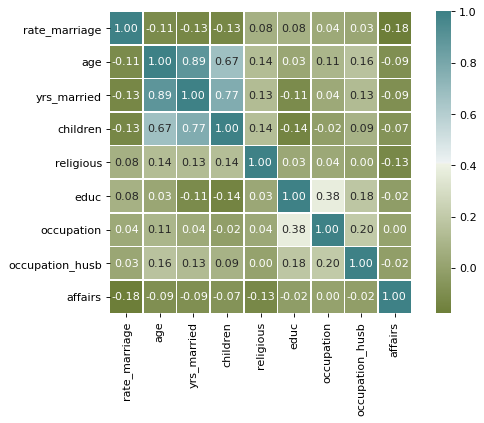

In [1583]:
corr = df.corr()

# sns.heatmap(corr, 
#             xticklabels=corr.columns.values,
#             yticklabels=corr.columns.values,
#             cmap="PiYG")

plt.figure(figsize=(8,5), dpi= 80)
sns.heatmap(corr,annot=True,linewidths=.5,fmt= '.2f',\
            mask=np.zeros_like(corr, dtype=np.bool), \
            cmap=sns.diverging_palette(100,200,as_cmap=True), square=True)

corr

In [1560]:
'''Удаляем одну из закоррелированных между собой переменных (ту, которая меньше связана с таргетом), но предварительно сделаем 
из неё доп признак '''
df['%_of_life_married'] = df['yrs_married']/df['age'] 
df.drop(['yrs_married'], axis = 1, inplace = True)

##### 4. Удаляем факторы, слабо закоррелированные с таргетом

In [1561]:
df.drop(['occupation'], axis = 1, inplace = True)

##### 5. Создаем новые признаки и проверяем улучшение качества модели на cross_val

In [1562]:
# Преобразование таргета:
df['affairs**2'] = df['affairs']**2
X_full = df.drop(['affairs','affairs**2'], axis = 1)
y_full = df[['affairs**2']]
print(cross_val_score(model, X_full, y_full, cv=cv, scoring='r2').mean())
print ('НЕ ОЧЕНЬ ПОЛУЧИЛОСЬ:(')
df.drop(['affairs**2'], inplace=True, axis = 1)

0.011350417108257571
НЕ ОЧЕНЬ ПОЛУЧИЛОСЬ:(


In [1563]:
# единовременное добавление новых признаков
X_full = df.drop(['affairs'], axis = 1)
y_full = df[['affairs']]
ini_qual = cross_val_score(model, X_full, y_full, cv=cv, scoring='r2').mean()
print(ini_qual)

df_ch = df.copy()

#Преобразование признаков
df_ch['Rate**2'] = df_ch['rate_marriage']**2
df_ch['Children**2'] = df_ch['children']**2
df_ch['rate_marriage_log'] = log(df_ch['rate_marriage'])
df_ch['religious_log'] = log(df['religious'])
df_ch['religious*ratemarriage'] = df_ch['religious'] * df_ch['rate_marriage']

X_full = df_ch.drop(['affairs'], axis = 1)
y_full = df_ch[['affairs']]
print(cross_val_score(model, X_full, y_full, cv=cv, scoring='r2').mean())

0.059202304433277786
0.06598688986454837


In [1585]:
# обучение модели и поиск коэффициентов
Xtrain, Xtest, ytrain, ytest = train_test_split(X_full, y_full, test_size=0.3, random_state=111)
model.fit(Xtrain, ytrain) 

pred_train = model.predict(Xtrain)
pred_test = model.predict(Xtest)

print (mean_squared_error(pred_train, ytrain), mean_squared_error(pred_test, ytest))
print(r2_score(ytrain,pred_train), r2_score(ytest,pred_test))
coefficients = pd.concat([pd.DataFrame(X_full.columns), pd.DataFrame(np.transpose(model.coef_))], axis=1)
coefficients

4.735476308620375 4.25392138610634
0.054827813918974955 0.052567967351931144


,0,0
0,rate_marriage,-0.415338
1,age,-0.005684
2,yrs_married,-0.021654
3,children,-0.025608
4,religious,-0.280994
5,educ,-0.014485
6,occupation,0.027335
7,occupation_husb,0.000972


In [1565]:
# добавление преобразований по одному с заменой исходного признака - RATE_MARRIAGE
print(ini_qual)

df['Rate**2'] = df['rate_marriage']**2


X_full = df.drop(['affairs', 'rate_marriage'], axis = 1)
y_full = df[['affairs']]
print(cross_val_score(model, X_full, y_full, cv=cv, scoring='r2').mean())
df.drop(['Rate**2'], axis = 1, inplace = True)

0.059202304433277786
0.05915170797169287


In [1566]:
# добавление преобразований по одному с заменой исходного признака - CHILDREN
print(ini_qual)

df['Children**2'] = df['children']**2

X_full = df.drop(['affairs', 'children'], axis = 1)
y_full = df[['affairs']]
print(cross_val_score(model, X_full, y_full, cv=cv, scoring='r2').mean())
df.drop(['Children**2'], axis = 1, inplace = True)

0.059202304433277786
0.05912390295154688


In [1567]:
# добавление преобразований по одному с заменой исходного признака - rate_marriage
print(ini_qual)

df['rate_marriage_log'] = log(df['rate_marriage'])

X_full = df.drop(['affairs', 'rate_marriage'], axis = 1)
y_full = df[['affairs']]
print(cross_val_score(model, X_full, y_full, cv=cv, scoring='r2').mean())
df.drop(['rate_marriage_log'], axis = 1, inplace = True)

0.059202304433277786
0.05458847107738509


In [1568]:
# добавление преобразований по одному с заменой исходного признака - religious
print(ini_qual)

df['religious_log'] = log(df['religious'])

X_full = df.drop(['affairs', 'religious'], axis = 1)
y_full = df[['affairs']]
print(cross_val_score(model, X_full, y_full, cv=cv, scoring='r2').mean())
df.drop(['religious_log'], axis = 1, inplace = True)

0.059202304433277786
0.05972572482137606


In [1569]:
# добавление преобразований по одному с заменой исходного признака - religious
print(ini_qual)

df['religious*ratemarriage'] = df['religious'] * df['rate_marriage']

X_full = df.drop(['affairs'], axis = 1)
y_full = df[['affairs']]
print(cross_val_score(model, X_full, y_full, cv=cv, scoring='r2').mean())
df.drop(['religious*ratemarriage'], axis = 1, inplace = True)
df

0.059202304433277786
0.06445685424642386


,rate_marriage,age,children,religious,educ,occupation_husb,affairs,%_of_life_married
0,3.0,32.0,3.0,3.0,17.0,5.0,0.111111,0.281250
1,3.0,27.0,3.0,1.0,14.0,4.0,3.230769,0.481481
2,4.0,22.0,0.0,1.0,16.0,5.0,1.400000,0.113636
3,4.0,37.0,4.0,3.0,16.0,5.0,0.727273,0.445946
4,5.0,27.0,1.0,1.0,14.0,4.0,4.666666,0.333333
...,...,...,...,...,...,...,...,...
6361,5.0,32.0,2.0,3.0,17.0,3.0,0.000000,0.406250
6362,4.0,32.0,1.0,1.0,16.0,5.0,0.000000,0.406250
6363,5.0,22.0,0.0,2.0,14.0,1.0,0.000000,0.113636
6364,5.0,32.0,1.0,3.0,14.0,4.0,0.000000,0.187500


In [1570]:
# обучение модели и поиск оценка коэффициентов
Xtrain, Xtest, ytrain, ytest = train_test_split(X_full, y_full, test_size=0.25, random_state=111)
model.fit(Xtrain, ytrain) 

pred_train = model.predict(Xtrain)
pred_test = model.predict(Xtest)

print (mean_squared_error(pred_train, ytrain))
print (mean_squared_error(pred_test, ytest))

print(r2_score(ytrain,pred_train), r2_score(ytest,pred_test))

4.608664740871508
4.466405866728847
0.0603497242799339 0.050074281014055755


КАЧЕСТВО МОДЕЛИ УДАЕТСЯ СЛЕГКА УЛУЧШИТЬ ЗА СЧЕТ ДОБАВЛЕНИЯ ВЗАИМОДЕЙСТВИЯ ПРИЗНАКОВ И/ИЛИ ИХ ИЗМЕНЕНИЯ (СТЕПЕНЬ / ЛОГАРИФМ).
ЕСЛИ ДОБАВЛЯТЬ НОВЫЕ ПРИЗНАКИ ПОСЛЕДОВАТЕЛЬНО (ПО ОТДЕЛЬНОСТИ), ТО ЕЛЕ ЗАМЕТНОГО УЛУЧШЕНИЯ УДАЕТСЯ ДОСТИЧЬ ЗА СЧЁТ ЛОГАРИФМИРОВАНИЯ ПРИЗНАКА 'RELIGIOUS'.